In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Data_Cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,design,protection,installation,power_system,excel
0,Aircraft Tech Spec I (Cabin Innovation)/ R&D E...,Employer Provided Salary:$56 Per Hour,Aviation Technology Associates (AVTECH) is loo...,-1.0,"Aviation Technology Associates, LLC","Savannah, GA",Unknown,-1,Company - Public,-1,...,56,56.0,"Aviation Technology Associates, LLC",GA,-1,1,0,0,0,0
1,Student Support Aide - Electrical and Computer...,$27K - $40K (Glassdoor est.),"Tuscaloosa, Alabama, United States\nEngineerin...",4.2,The University of Alabama\n4.2,"Tuscaloosa, AL",1001 to 5000 Employees,-1,College / University,-1,...,40,33.5,The University of Alabama\n,AL,-1,0,0,0,0,0
2,Component Electrical Eng Co-op - Spring/Summer...,$40K - $64K (Glassdoor est.),Description:\nJob Title: Component Electrical ...,3.6,L3Harris Technologies\n3.6,"Mason, OH",10000+ Employees,2019,Company - Public,Aerospace & Defense,...,64,52.0,L3Harris Technologies\n,OH,1,0,0,0,0,0
3,Electrical Engineer,Employer Provided Salary:$83K - $89K,Posting Information\nDepartment\nFS-Eng-Facili...,4.0,University of North Carolina at Chapel Hill\n4.0,"Chapel Hill, NC",1 to 50 Employees,-1,College / University,Colleges & Universities,...,89,86.0,University of North Carolina at Chapel Hill\n,NC,-1,0,0,0,0,0
4,Electrical Engineer PE,$79K - $112K (Glassdoor est.),ENG (ENG) is a 36 year old publicly listed (NA...,2.8,Englobal Master\n2.8,"Houston, TX",201 to 500 Employees,1985,Company - Public,Architectural & Engineering Services,...,112,95.5,Englobal Master\n,TX,35,0,1,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'design', 'protection', 'installation', 'power_system', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'electrical engineer' in title.lower():
        return 'electrical engineer'
    elif 'electronics engineer' in title.lower():
        return 'electronics engineer'
    elif 'Process Eng' in title.lower():
        return 'Process Eng'
    elif 'Reliability' in title.lower():
        return 'Reliability'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:

df['job_simp'] = df['Job Title'].apply(title_simplifier)


In [7]:

df.job_simp.value_counts()


na                     637
electrical engineer    129
director                33
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        699
senior     67
jr         33
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    132
AL    100
TX    100
NC     67
GA     60
NY     40
OH     34
IN     34
WI     33
MA     33
IA     33
KY     33
AZ     33
OR     33
TN     30
SC      4
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      390
1      264
2      381
3      181
4      735
      ... 
794    381
795    181
796    735
797    716
798    642
Name: desc_len, Length: 799, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)


In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,1,112,112
5,1,160,200
20,1,136,150
24,1,112,112
29,1,160,200
...,...,...,...
768,1,112,112
773,1,160,200
788,1,136,150
792,1,112,112


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))


In [14]:
df['company_txt']


0              Aviation Technology Associates, LLC
1                        The University of Alabama
2                            L3Harris Technologies
3      University of North Carolina at Chapel Hill
4                                  Englobal Master
                          ...                     
794                          L3Harris Technologies
795    University of North Carolina at Chapel Hill
796                                Englobal Master
797                    InnoTech Construction, Inc.
798                                Huhtamaki Group
Name: company_txt, Length: 799, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,design,protection,installation,power_system,excel,desc_len
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.0,799.000000,799.000000
mean,3.051314,1236.599499,0.118899,0.202753,73.821026,101.610763,78.970588,36.854819,0.284105,0.042553,0.041302,0.0,0.123905,809.301627
std,1.816223,948.072804,0.323872,0.402302,35.935012,44.520080,32.327498,45.337016,0.451270,0.201974,0.199112,0.0,0.329679,770.317503
min,-1.000000,-1.000000,0.000000,0.000000,27.000000,40.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,181.000000
25%,3.100000,-1.000000,0.000000,0.000000,47.000000,68.000000,54.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,381.000000
50%,3.800000,1924.000000,0.000000,0.000000,63.000000,89.000000,72.500000,26.000000,0.000000,0.000000,0.000000,0.0,0.000000,716.000000
75%,4.200000,1985.000000,0.000000,0.000000,83.000000,112.000000,87.500000,55.000000,1.000000,0.000000,0.000000,0.0,0.000000,814.000000
max,4.400000,2019.000000,1.000000,1.000000,160.000000,200.000000,159.500000,157.000000,1.000000,1.000000,1.000000,0.0,1.000000,3842.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'design', 'protection', 'installation', 'power_system', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

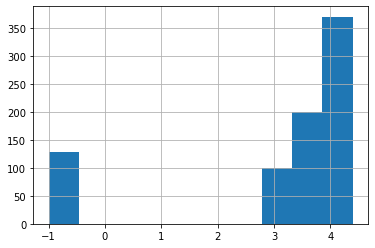

In [17]:
df.Rating.hist()


<AxesSubplot:>

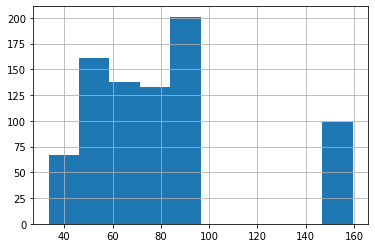

In [18]:
df.avg_salary.hist()


<AxesSubplot:>

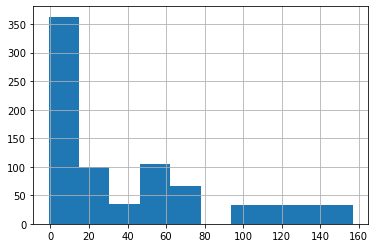

In [19]:

df.age.hist()


<AxesSubplot:>

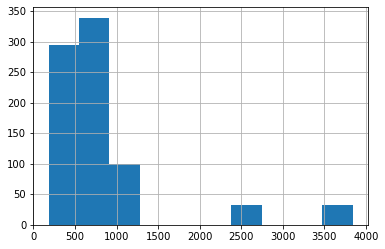

In [20]:
df.desc_len.hist()


<AxesSubplot:>

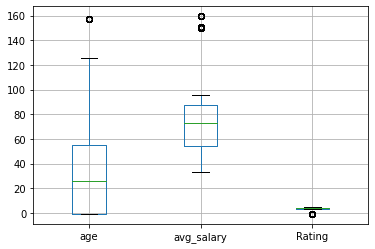

In [21]:
df.boxplot(column = ['age','avg_salary','Rating'])


<AxesSubplot:>

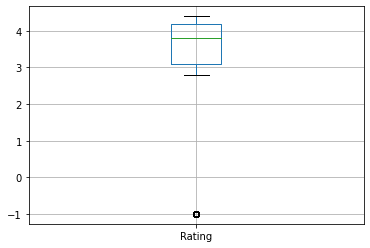

In [22]:
df.boxplot(column = 'Rating')

In [23]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.239257,0.362198,0.177432
avg_salary,0.239257,1.000000,0.054907,-0.043575
Rating,0.362198,0.054907,1.000000,0.067600
desc_len,0.177432,-0.043575,0.067600,1.000000


<AxesSubplot:>

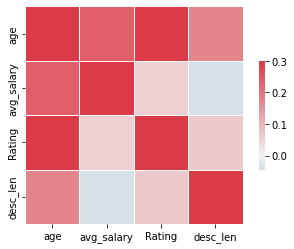

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'design', 'protection', 'installation', 'power_system', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'design', 'protection',
       'installation', 'power_system', 'excel', 'job_simp', 'seniority']]




graph for Location: total = 21


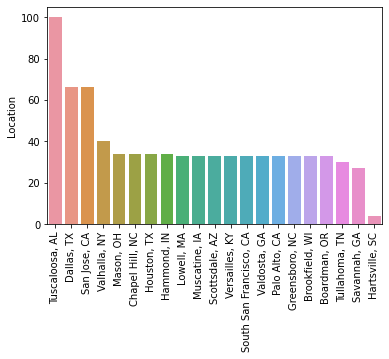

graph for Size: total = 7


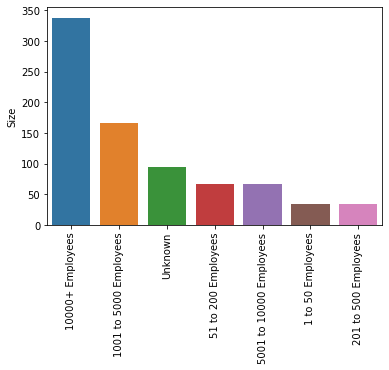

graph for Type of ownership: total = 5


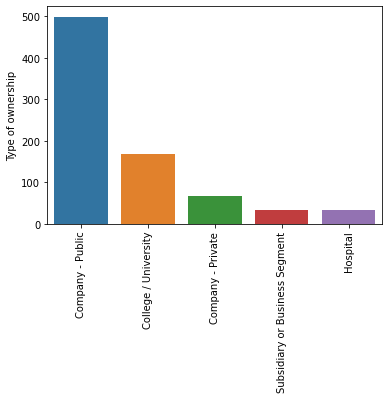

graph for Industry: total = 16


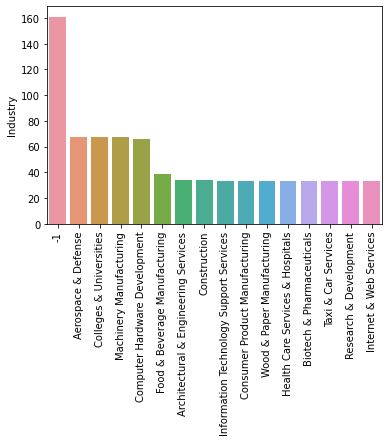

graph for Sector: total = 10


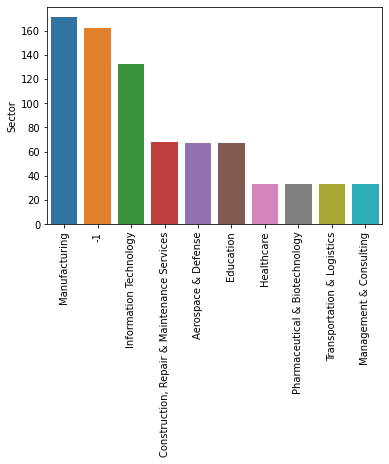

graph for Revenue: total = 9


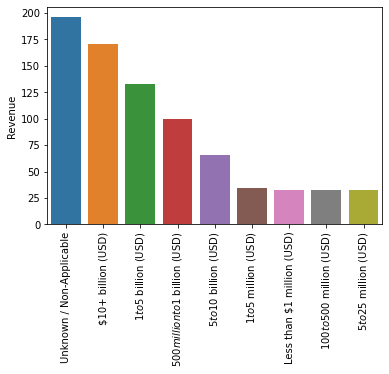

graph for company_txt: total = 21


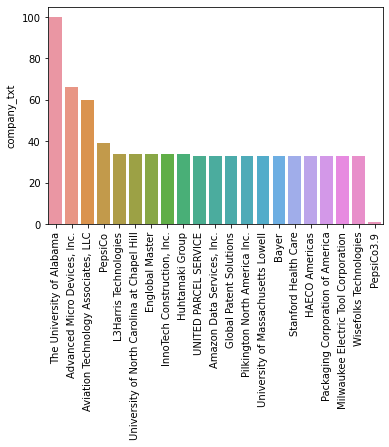

graph for job_state: total = 16


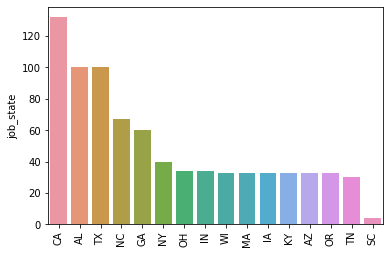

graph for design: total = 2


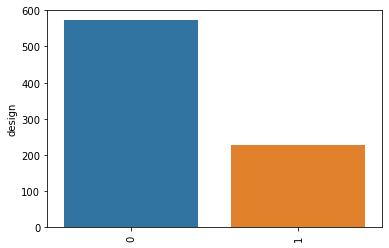

graph for protection: total = 2


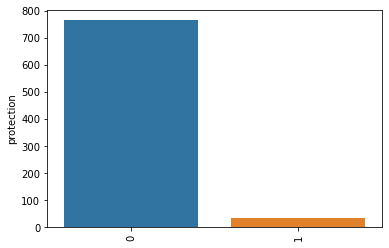

graph for installation: total = 2


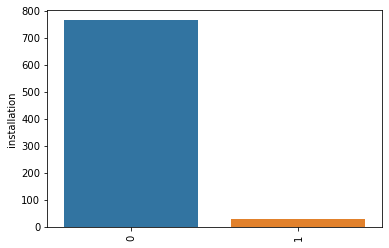

graph for power_system: total = 1


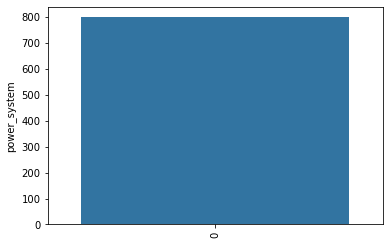

graph for excel: total = 2


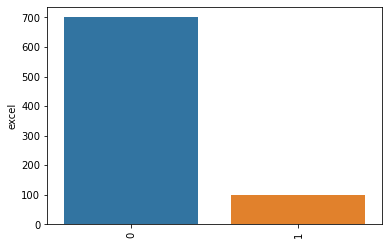

graph for job_simp: total = 3


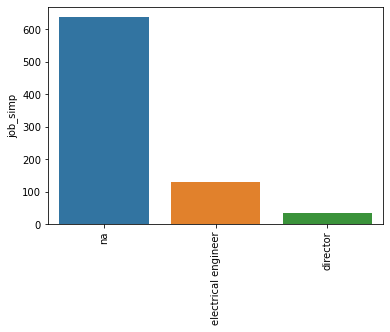

graph for seniority: total = 3


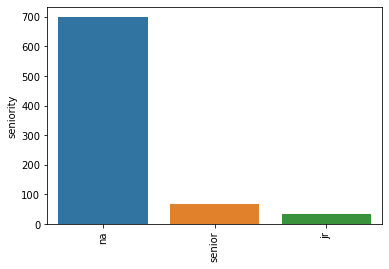

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


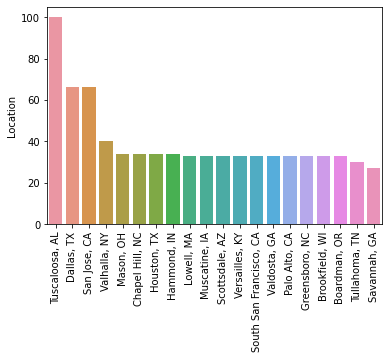

graph for Sector: total = 10


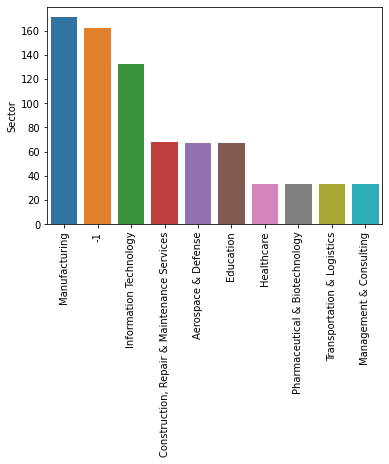

graph for company_txt: total = 20


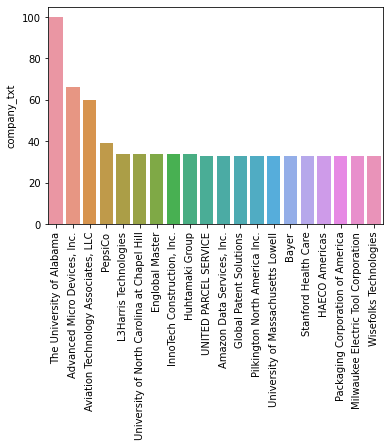

In [28]:
for i in df_cat[['Location','Sector','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'design', 'protection', 'installation', 'power_system', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [70]:
zy = df.head()
zy

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,job_state,age,design,protection,installation,power_system,excel,job_simp,seniority,desc_len
0,Aircraft Tech Spec I (Cabin Innovation)/ R&D E...,Employer Provided Salary:$56 Per Hour,Aviation Technology Associates (AVTECH) is loo...,-1.0,"Aviation Technology Associates, LLC","Savannah, GA",Unknown,-1,Company - Public,-1,...,GA,-1,1,0,0,0,0,electrical engineer,na,390
1,Student Support Aide - Electrical and Computer...,$27K - $40K (Glassdoor est.),"Tuscaloosa, Alabama, United States\nEngineerin...",4.2,The University of Alabama\n4.2,"Tuscaloosa, AL",1001 to 5000 Employees,-1,College / University,-1,...,AL,-1,0,0,0,0,0,na,na,264
2,Component Electrical Eng Co-op - Spring/Summer...,$40K - $64K (Glassdoor est.),Description:\nJob Title: Component Electrical ...,3.6,L3Harris Technologies\n3.6,"Mason, OH",10000+ Employees,2019,Company - Public,Aerospace & Defense,...,OH,1,0,0,0,0,0,na,na,381
3,Electrical Engineer,Employer Provided Salary:$83K - $89K,Posting Information\nDepartment\nFS-Eng-Facili...,4.0,University of North Carolina at Chapel Hill\n4.0,"Chapel Hill, NC",1 to 50 Employees,-1,College / University,Colleges & Universities,...,NC,-1,0,0,0,0,0,electrical engineer,na,181
4,Electrical Engineer PE,$79K - $112K (Glassdoor est.),ENG (ENG) is a 36 year old publicly listed (NA...,2.8,Englobal Master\n2.8,"Houston, TX",201 to 500 Employees,1985,Company - Public,Architectural & Engineering Services,...,TX,35,0,1,0,0,0,electrical engineer,na,735


In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
director,159.500000
electrical engineer,83.279070
na,73.926217


In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp            seniority            
director            na         159.500000
electrical engineer na          80.873684
                    senior      90.000000
na                  jr          87.000000
                    na          68.774081
                    senior     150.000000

In [32]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                       
WI        na                    64.000000
TX        na                    79.250000
          electrical engineer   95.500000
TN        electrical engineer   90.000000
SC        electrical engineer   90.000000
OR        na                    72.500000
OH        na                    52.000000
NY        na                    62.337500
NC        na                    52.000000
          electrical engineer   86.000000
MA        na                    80.000000
KY        na                    69.500000
IN        na                    77.500000
IA        na                    87.000000
GA        na                    48.500000
          electrical engineer   56.000000
CA        na                   129.666667
          director             159.500000
AZ        na                    68.500000
AL        na                    42.410000

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                       
WI        na                           33
TX        na                           66
          electrical engineer          34
TN        electrical engineer          30
SC        electrical engineer           4
OR        na                           33
OH        na                           34
NY        na                           40
NC        na                           33
          electrical engineer          34
MA        na                           33
KY        na                           33
IN        na                           34
IA        na                           33
GA        na                           33
          electrical engineer          27
CA        na                           99
          director                     33
AZ        na                           33
AL        na                          100

In [35]:
pd.pivot_table(df[df.job_simp == 'electrical engineer'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
TX,95.5
SC,90.0
TN,90.0
NC,86.0
GA,56.0


In [36]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'design', 'protection', 'installation', 'power_system', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'design', 'protection', 'installation', 'power_system', 'excel', 'Type of ownership','avg_salary']]


In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.0    117.522388
 2.8     95.500000
 4.2     86.200431
 3.5     82.671642
-1.0     77.019531
 3.8     71.000000
 3.0     68.500000
 4.4     64.000000
 3.9     62.500000
 3.1     52.000000
 3.6     52.000000
 3.7     48.500000
Industry
                                         avg_salary
Industry                                           
Computer Hardware Development            155.250000
Health Care Services & Hospitals         150.000000
Architectural & Engineering Services      95.500000
Construction                              90.000000
Taxi & Car Services                       88.000000
Biotech & Pharmaceuticals                 87.000000
Information Technology Support Services   87.000000
Colleges & Universities                   83.044776
Machinery Manufacturing                   73.559701
Internet & Web Services                   72.500000
Research & Development                    68.500000
Consumer Product Manufacturing            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [39]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'design', values = 'avg_salary', aggfunc = 'count')


design,0,1
Revenue,,
$1 to $5 billion (USD),133.0,NaN
$1 to $5 million (USD),34.0,NaN
$10+ billion (USD),138.0,33.0
$100 to $500 million (USD),NaN,33.0
$5 to $10 billion (USD),33.0,33.0
$5 to $25 million (USD),33.0,NaN
$500 million to $1 billion (USD),100.0,NaN
Less than $1 million (USD),33.0,NaN
Unknown / Non-Applicable,68.0,128.0


In [62]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

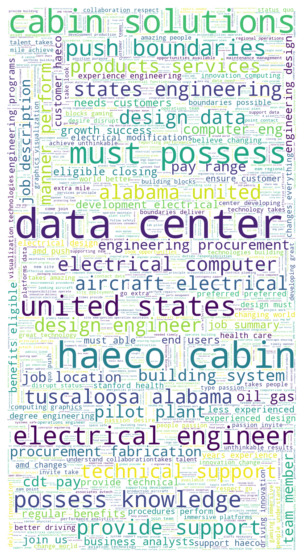

In [68]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()